# 2-1. 들어가며

퍼즐 맞추는 것을 즐기시나요? 머리가 복잡해 어딘가에 몰두하고 싶거나, 작은 성취가 고플 땐 퍼즐이 아주 좋답니다. 난이도 별로, 그림 별로 정말 많은 퍼즐이 있고 심지어는 아예 그림이 없는 퍼즐도 있다고 해요 (백야 퍼즐이라고 불린답니다). 필자는 너무 조각 수가 많지 않고, 예쁜 명화를 채워 넣는 퍼즐을 간간히 즐깁니다!

문득 생각하길, 문장을 만드는 것이 마치 퍼즐 맞추기 같더군요. 조각들이 제각기 다른 모양을 가지고 있고, 맞는 위치에 있더라도 그림이 다를 수 있죠. 모양과 그림이 모두 맞아야 비로소 작품이 완성되는 것, 마치 문맥과 문법을 고려하는 것과 꼭 닮았습니다! 대신 우리의 문장 퍼즐은 단 하나의 작품을 목표로 하지 않죠. 올바르게 맞춰진 퍼즐, 그 위의 그림이 어울린다면 그 자체로 작품입니다!

이번 코스에서 우리가 배울 것이 바로 문장을 조각내는 방법입니다. 어떤 문장을 일정한 기준을 갖는 단어로 쪼개는 것, 그것은 곧 퍼즐 조각을 나누는 것과 같죠! 지나치게 잘게 쪼개면 넓은 그림을 담을 수 없어 되 맞추기 어려울 것이고, 너무 크게 쪼갰다간 퍼즐이 너무 쉬워지고 말 겁니다.

이번 코스에선 문장 데이터를 직접 토큰화하며 어떤 방법이 가장 적합한 단어 조각을 만들어 내는지 실습해보도록 하겠습니다.

## 준비물
이번 코스에서는 KoNLPy, 그중에서도 가장 성능이 준수한 MeCab클래스를 활용해 실습하도록 하겠습니다!

실습할 MeCab 클래스는 Windows에서 지원이 되지 않습니다. 우분투 환경이 준비되어 있다면 우분투 환경에서 실습하시길 바랍니다! 만일 우분투 환경에 접근이 어렵다면 구글에서 제공하는 Colab 서비스를 사용해보세요.

* [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#recent=true)
                        
[우분투 환경에서 설치하기] 1) 우분투 환경에서 커널을 열어 jdk를 먼저 설치해줍시다.

``` termianl
$ sudo apt-get install g++ openjdk-8-jdk
```

2) 설치가 완료되었다면 curl을 이용해 mecab을 다운받아 실행 시켜 줍니다.

``` termianl
$ bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
```
3) 그리고 마지막으로 konlpy를 설치해 줍니다.

``` termianl
$ pip install konlpy
```

그 외 다른 OS의 설치 방법이 궁금하시다면 아래 공식 문서를 참고하시길 바라요!

[설치하기 - KoNLPy 0.5.2 documentation](http://konlpy.org/ko/latest/install/)

설치가 완료된 후엔 아주 간편하게 import 하여 형태소 분석기를 사용하실 수 있습니다.



In [1]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


# 2-2. 데이터 다운로드 및 분석

먼저 프로젝트에 사용될 라이브러리를 import 합니다.



In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

그럼 학습환경을 구성하고 데이터를 다운받아 보겠습니다.

``` terminal 
$ wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
$ mkdir -p ~/aiffel/sp_tokenizer/data
$ mv korean-english-park.train.tar.gz ~/aiffel/sp_tokenizer/data
$ cd ~/aiffel/sp_tokenizer/data
$ tar -xzvf korean-english-park.train.tar.gz
```

In [4]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


내려받은 데이터는 한국어의 형태소 분석과 품사 태깅, 기계 번역 연구를 위해 공개된 데이터입니다. 이번에 사용할 데이터는 한국어-영어 병렬을 이루는 말뭉치 중 한국어 부분으로, 전체 병렬 말뭉치는 후에 번역기를 만들며 사용할 예정입니다!

혹시 다른 종류의 데이터가 궁금하시다면 아래 Github를 방문해보세요!

* [jungyeul/korean-parallel-corpora](https://github.com/jungyeul/korean-parallel-corpora)

자, 데이터가 우리 손으로 들어왔으니 씹고 뜯고 맛볼 차례입니다! 멋진 시각화를 동반한 통계적 분석…까지는 하지 않고요. 최소한의 분석으로 데이터가 얼마나 있고, 어떻게 생겼는지 정도를 직접 확인해 봅시다.

문장은 위에서 확인한 것처럼 94123개가 포함되어 있습니다. 우리는 각 문장이 어느 정도의 길이를 가지는지 확인해보겠습니다! 이 과정을 거치면 지나치게 긴 데이터를 삭제하거나 (연산량을 감소시켜 학습 속도가 빨라집니다!) 지나치게 짧은 데이터를 검증 (무조건 필요가 없지는 않습니다, 단어 ↔ 단어 라면 번역을 학습할 수 있겠죠!) 할 수 있습니다. 즉, 데이터를 얼마나 사용할지 타협점을 정의할 수 있습니다.

아래 소스는 문장의 최단 길이, 최장 길이, 평균 길이를 구한 후 문장 길이 분포를 막대그래프로 표현해주는 소스입니다. raw 변수는 앞서 다운로드받은 데이터가 담긴 변수입니다!

문장의 최단 길이: 999
문장의 최장 길이: 377
문장의 평균길이: 60.78048935966767


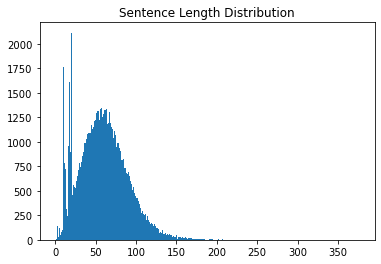

In [29]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: men_len = length
    if max_len < length: max_len = length
    sum_len += length
    
print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균길이:", sum_len / len(raw))


sentence_length = np.zeros((max_len),dtype = np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1
    
plt.bar(range(max_len), sentence_length, width = 1.0 )
plt.title("Sentence Length Distribution")
plt.show()

최단 길이 1, 최장 길이 377… 그리고 제법 그럴듯한 막대그래프가 나왔습니다만, 이 결과를 확인하고 드는 생각은 아래와 크게 다르지 않으실 거예요..!

1) 길이 1 짜리 문장은 도대체 어떻게 생겨먹었지?

2) 앞에 치솟는 임의의 구간은 뭐지? 유의미한 데이터가 담겨있는 부분인가?

3) 어디서부터 어디까지 잘라서 쓰지?

궁금증을 하나하나 해결해 봅시다! 대체 길이가 1인 문장은 뭘까요?

In [30]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count> 100: return
            
check_sentence_with_length(raw,1)

’


오잉? 하마터면 완전 노이즈인 데이터를 그대로 사용할 뻔했습니다! 왠지 길이별로 확인할 일이 많을 것 같아 함수를 미리 정의해두었는데, 이를 이용해 확인이 필요해 보이는 문장은 모두 확인해보죠.

In [34]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출하빈다.
    if _sum > 1500:
        print("Outlier index", idx + 1)

Outlier index 11
Outlier index 19
Outlier index 21


In [35]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

이런… 심지어 중복에 대한 처리도 제대로 하지 않았었네요. 중복 제거는 Python의 기본 자료형 set을 활용할 겁니다. set은 집합을 정의하는 자료형인데, 중복을 허용하지 않아 변환 과정에서 자동으로 중복된 요소를 제거해주거든요! 대신 list의 순서가 뒤죽박죽될 수 있으니, 만약 번역 데이터처럼 쌍을 이뤄야 하는 경우라면 주의해서 사용하셔야 합니다!

중복을 제거한 후, 앞에서 분포를 확인한 소스를 다시 실행 시켜 보겠습니다!



Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


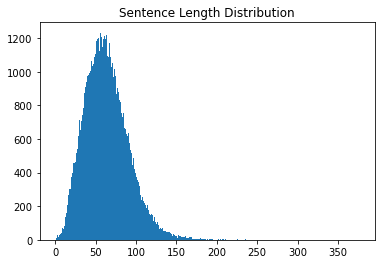

In [38]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

이제서야 깔끔한 데이터를 얻은 느낌이 드네요. 데이터의 개수도 17000개가량 줄어 77591 개가 되었습니다.

마지막으로 '모든 데이터를 다 사용할 것이냐' 가 문제인데, 후에 미니 배치를 만들 것을 생각하면 모든 데이터를 다 사용하는 것은 연산 측면에서 비효율적입니다. 미니 배치 특성상 각 데이터의 크기가 모두 동일해야 하기 때문에 가장 긴 데이터를 기준으로 Padding 처리를 해야 합니다. 위의 데이터에서 만약 길이가 100인 문장까지만 사용한다면 데이터는 [ (77591 - 길이 100 초과 문장 수) x 100 ] 의 형태를 갖겠지만 모두 사용할 경우 [ 77591 x 377 ] 로 전자보다 최소 3.7배 큰 메모리를 차지합니다. 학습 시간도 그만큼 더 오래 걸리고요.

길이별로 정렬하여 미니 배치를 구성해 Padding을 최소화하는 방법도 있지만 이는 데이터를 섞는 데 편향성이 생길 수 있으므로 지양해야 합니다. 여기서는 길이 150 이상의 데이터를 제거하고 사용하도록 할게요!

그리고 앞서 확인한 것처럼 너무 짧은 데이터는 오히려 노이즈로 작용할 수 있습니다. 따라서 길이가 10 미만인 데이터도 제거하도록 하죠!

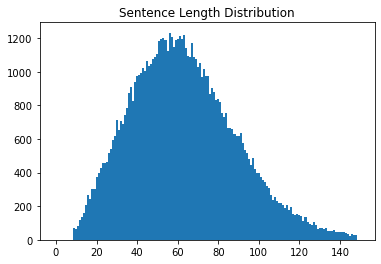

In [39]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]
                                                                      
# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype = np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

그리고 최종적인 데이터 분포를 확인하면 위와 같습니다!


이제 정말 사용할 준비가 된 것 같죠? 본격적인 작업을 시작해봅시다

# 2-3. 공백 기반 토큰화

배운 순서대로, 먼저 공백 기반 토큰화를 진행해 봅시다!

정제된 데이터를 공백 기반으로 토큰화하여 list에 저장한 후, 아래 tokenize() 함수를 사용해 단어 사전과 Tensor 데이터를 얻으세요! 그리고 단어 사전의 크기를 확인하세요!



In [40]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [44]:
filtered_corpus[0].split()

['그들은', '날조된', '서류', '및', '사망한', '남성과', '5세', '소년의', '신분증을', '사용했습니다.']

In [45]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

코드 확인

``` python 
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())
```
정답을 확인해 보셨나요? 이제 공백 기반 토큰화를 진행한 후, 단어 사전의 길이를 확인해봅시다.

In [46]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


아래의 코드로 생성된 단어 사전을 확인해 볼 수 있습니다.



In [47]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)
    
    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


동사로 이루어진 단어를 살피면 공백 기반 토큰화의 문제점을 확인할 수 있습니다. 1번 단어인 밝혔다. 는 밝히다 , 밝다 등과 유사한 의미를 지니고 있음에도 전혀 다른 단어로 분류되겠죠? 이 때문에 공백 기반 토큰화는 불필요하게 큰 단어 사전을 가지게 되며 이는 연산량 증가로 이어집니다.

만일 밝 + 혔다 라고 토큰화했다면 어땠을까요? 밝 + 히다, 밝 + 다 같은 구절이 등장했을 때, 공통된 어절인 밝 은 하나로 묶여 학습 중에 의미를 파악하기가 수월해지겠죠? 동시에 단어 사전도 효율적으로 축소될 것입니다. 이를 위해 형태소 분석기가 존재합니다!

# 2-4. 형태소 기반 토큰화

한국어 형태소 분석기는 대표적으로 Khaiii와 KoNLPy가 사용됩니다. 이번 코스에서는 KoNLPy, 그중에서도 가장 성능이 준수한 MeCab클래스를 활용해 실습하도록 하겠습니다!

앞서 작성했던 코드를 활용해 MeCab 기반으로 생성된 단어 사전과 Tensor 데이터를 얻어 봅시다!



In [48]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    # 코드를 작성하세요
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

코드 확인
``` python
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))
```
정답을 확인해 보셨나요? 이제 형태소 기반 토큰화를 진행한 후, 단어 사전의 길이를 확인해 봅시다.



In [51]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


앞서 실습했던 공백 기반 단어 사전에 비해 단어 수가 현저히 줄어든 것을 확인하셨을 겁니다. 이는 곧 연산량의 감소로 이어져 더 빠른 학습을 가능케 하고, 심지어 모델이 튜닝해야 하는 매개변수(Parameter) 수가 줄어들어 학습도 더 잘 된답니다! 적어도 한국어를 처리할 때는 공백 기반 토큰화를 절대 지양하셔야해요!

다음 스텝에서 배울 SentencePiece같은 Subword 기반 토큰화보다 형태소 분석기가 좋은 성능을 내는 사례들이 종종 있는데요, ETRI에서 발표한 한국어 BERT 모델인 KorBERT가 대표적인 사례 중 하나입니다. 아래 웹페이지를 방문하면 모델의 자세한 구조뿐 아니라 KorBERT 모델을 5가지 자연어 처리 태스크를 기준으로 평가했던 흥미로운 결과까지 살펴보실 수 있습니다!

* [공공 인공지능 오픈 API·DATA 서비스 포털](http://aiopen.etri.re.kr/service_dataset.php)

자연어처리에서 토크나이저가 성능에 미치는 영향도가 크다는 것은 주지의 사실입니다만, 위 링크에서 발표된 평가결과를 살펴볼 때 몇가지 생각해 볼 만한 지점이 있습니다.

아래 질문들에 대해 스스로 생각해 보고 본인의 생각을 정리해서 답변해 보시기 바랍니다. 사실 정답이 있는 문제는 아니기 때문입니다.

> Q1. 구글의 Word Piece 기반 한국어 언어모델이 엑소브레인의 Word Piece 기반 한국어 언어모델보다 전체적으로 성능이 크게 떨어지는 것은 어떤 의미일까요? 여기서 유의해야 할 것은 언어모델(BERT)을 훈련시킨 원리는 동일하며, 토크나이저가 구성된 원리도 Word Piece 기반으로 동일하다는 점입니다.

예시답안
구글에서 배포한 BERT 모델은 한국어 전용 코퍼스를 바탕으로 훈련된 것이 아니라 Multilingual 코퍼스를 바탕으로 훈련된 것이며, Word Piece 모델 안에 포함된 subword 안에도 한국어가 아닌 여러 언어의 것이 섞여 있어서 한국어 자연어처리 태스크에 특화된 모델이 아닙니다. (상세한 내용은 https://github.com/google-research/bert 참조) 


엑소브레인의 것은 한국어 코퍼스에 특화된 형태로 언어모델과 토크나이저가 훈련된 것이므로 엑소브레인과 구글의 BERT 모델의 한국어 테스크 성능 차이는 한국어에 특화된 언어 모델을 구축했을 때 기대할 수 있는 성능 향상치로 해석할 수 있습니다.


> Q2. 엑소브레인의 BERT에 두 가지 버전이 있는데, 이 중 한국어 전용 형태소분석기 토크나이저를 사용한 버전이 WordPiece 모델 토크나이저를 사용한 버전보다 대체로 성능이 좋다는 것의 시사점은 무엇일까요?

예시답안
WordPiece 모델은 해당 언어의 문법적 및 의미적 사전정보가 반영되지 않은 채 순수하게 통계적인 빈도 기반으로 자주 사용되는 반복 패턴을 사전으로 등재해 놓은 것에 불과합니다. 그에 비해 정확한 한국어 문법과 의미정보를 바탕으로 개발된 형태소분석기가 정확하게 동작한다면 현재까지 가장 성능이 좋다고 알려진 Subword 기반의 토크나이저보다 더 성능이 좋을 수 있음을 보여 줍니다.

> Q3. 정교한 형태소분석기를 활용한 모델의 성능이 더 좋을 수 있음에도 불구하고 현장에서 SentencePiece 같은 Subword 기반 토크나이저가 더욱 각광받는 이유는 무엇일까요?

예시답안
언어는 지속적으로 변합니다. 정교한 형태소분석기의 성능을 유지하기 위해서는 지속적인 데이터관리와 유지보수 작업이 필요합니다. 


그에 비해 SentencePiece 모델은 코퍼스데이터로부터 쉽게 추출해서 생성 가능하며, Subword 기반이기 때문에 새롭게 생성되는 단어에 대한 OOV(Out-of-Vocabulary) 문제에 대해서도 robust하게 대처할 수 있는 장점이 있습니다. 그리고 언어에 중립적이기 때문에 여러 언어가 섞여 나오는 텍스트를 처리하는 데에도 능합니다. 


무엇보다도, 특정 언어에 대한 부가지식이 없이도 엔지니어가 그 언어에 대한 작업을 손쉽게 진행할 수 있도록 해준다는 점과 그 언어에 특화된 토크나이저의 성능에 뒤지지 않거나 대체로 능가하는 성능을 보여주기 때문입니다.

#### tensor -> sentence Decoding 

지금까지 문장을 Tensor로 Encoding하는 과정을 배웠는데요.
후에 모델이 생성한 Tensor를 문장으로 Decoding하는 과정도 필요하겠죠?

1) tokenizer.sequences_to_texts() 함수를 사용하여 Decoding

2) tokenizer.index_word 를 사용하여 Decoding

두 가지 방법으로 mecab_tensor[100] 을 원문으로 되돌려 보세요! (여기서 띄어쓰기는 고려하지 않습니다!)



In [71]:
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

편안 한 신발 도 도움 이 된다 .


``` python
코드 확인
# Case 1
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])
```

In [76]:
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "
    
print(sentence)

편안 한 신발 도 도움 이 된다 . 


코드 확인
``` python
# Case 2
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)
```

In [78]:
mecab_tensor[100]

array([4926,   18, 2827,   40,  613,    3,  183,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [79]:
mecab_tokenizer.index_word[4926]

'편안'

In [70]:
texts[0]

'편안 한 신발 도 도움 이 된다 .'

# 2-5. 프로젝트: SentencePiece 사용하기
### Step 1. SentencePiece 설치하기
----------------
SentencePiece는 SentencePiece는 Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer 로서, BPE와 unigram 2가지 subword 토크나이징 모델 중 하나를 선택해서 사용할 수 있도록 패키징한 것입니다. 아래 링크의 페이지에서 상세한 내용을 파악할 수 있습니다.

* [google/sentencepiece](https://github.com/google/sentencepiece)

위 페이지의 서두에서도 언급하고 있듯, SentencePiece는 딥러닝 자연어처리 모델의 앞부분에 사용할 목적으로 최적화되어 있는데, 최근 pretrained model들이 거의 대부분 SentencePiece를 tokenizer로 채용하면서 사실상 표준의 역할을 하고 있습니다. 앞으로의 실습 과정에서 자주 만나게 될 것이므로 꼭 친숙해지시기를 당부드립니다.

다음과 같이 설치를 진행합니다. SentencePiece는 python에서 쓰라고 만들어진 라이브러리는 아니지만 편리한 파이썬 wrapper를 아래와 같이 제공하고 있습니다.

``` teminal
$ pip install sentencepiece
```

### Step 2. SentencePiece 모델 학습
앞서 배운 tokenize() 함수를 기억하나요? 다시 한번 상기시켜드릴게요!

``` python
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer
```

위와 같이 tf.keras.preprocessing.text.Tokenizer에 corpus를 주고 tokenizer.fit_on_texts(corpus)을 하면 토크나이저 내부적으로 단어사전과 토크나이저 기능을 corpus에 맞춤형으로 자동생성해 주는 것입니다.

그럼 이를 위해서 SentencePiece 모델을 학습하는 과정을 거쳐야 합니다.

In [80]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME') + '/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus: # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')
        
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 ssac4 ssac4 376896  4월 13 16:00 korean_spm.model
-rw-r--r-- 1 ssac4 ssac4 146388  4월 13 16:00 korean_spm.vocab


위 코드를 실행하면 정상적으로 SentencePiece 모델 학습이 완료된 후 koreanspm.model 파일과 koreanspm.vocab vocabulary 파일이 생성되었음을 확인할 수 있습니다.

그럼 이렇게 학습된 SentencePiece 모델을 어떻게 활용하는지 살펴보겠습니다.

In [82]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentbence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1244, 11, 306, 7, 3599, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


> SampleEncodeAsPieces 패러미터                  
Pieces sampling                        
deterministic-based: 1          
probability-based: -1                     
alpha =1.0: more likely sampling                
alpha =0.0: uniformly sampling                   


어떻습니까? SentencePiece의 토크나이징 실력이 괜찮은 것 같습니다.

### Step 3. Tokenizer 함수 작성
우리는 위에서 훈련시킨 SentencePiece를 활용하여 위 함수와 유사한 기능을 하는 sp_tokenize() 함수를 정의할 겁니다. 하지만 SentencePiece가 동작하는 방식이 단순 토큰화와는 달라 완전히 동일하게는 정의하기 어렵습니다. 그러니 아래 조건을 만족하는 함수를 정의하도록 하습니다.

1) 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달합니다.

2) 생성된 vocab 파일을 읽어와 { <word> : <idx> } 형태를 가지는 word_index 사전과 { <idx> : <word>} 형태를 가지는 index_word 사전을 생성하고 함께 반환합니다.

3) 리턴값인 tensor 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding은 당연히 해야겠죠?



In [90]:
def sp_tokenize(s, corpus):
    tensor = []
    
    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))
        
    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()
        
    word_index = {}
    index_word = {}
    
    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]
        
        word_index.update({idx:word})
        index_word.update({word:idx})
        
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    
    return tensor, word_index, index_word

In [91]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1949 5662    5    4 7975 1983    3    0    0    0    0    0    0    0]
 [ 107 1638  101    4    0  419   11    4   14    0 1969    3    3    3]]


### Step 4. 네이버 영화리뷰 감정분석 문제에 SentencePiece 적용해 보기

아마 여러분들은 네이버 영화리뷰 감정분석 태스크를 한 번쯤은 다루어 보았을 것입니다. 한국어로 된 corpus를 다루어야 하므로 주로 KoNLPy에서 제공하는 형태소 분석기를 사용하여 텍스트를 전처리해서 RNN 모델을 분류기로 사용했을 것입니다.

만약 이 문제에서 tokenizer를 sentencepiece로 바꾸어 다시 풀어본다면 더 성능이 좋아질까요? 비교해 보는 것도 흥미로울 것입니다.

* 네이버 영화리뷰 감정분석 코퍼스에 sentencepiece를 적용시킨 모델 학습하기

* 학습된 모델로 sp_tokenize() 메소드 구현하기
 
* 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정분석 모델을 재학습하기

* KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기

* (보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

* Word Vector는 활용할 필요가 없습니다. 활용이 가능하지도 않을 것입니다.

머지않아 SentencePiece와 BERT 등의 pretrained 모델을 함께 활용하는 태스크를 다루게 될 것입니다.